<img src="../img/ods_stickers.jpg" />

## 主成分分析和聚类

---

#### 介绍

无监督学习是机器学习中的一类重要算法。与监督学习算法相比，无监督学习算法不需要对输入数据进行标记，即不需要给出标签或类别。此外，无监督学习算法还可以在没有辅助的情况下能够学习数据的内在关系。

由于数据不需要手动标记标签，这可以使许多无监督算法能够处理大量的数据，从而节省了大量的人力成本。但是，这也给其带来一个问题，因为无监督学习算法在学习时没有使用标签数据，所以一般情况下很难直观地去评估无监督学习算法的质量。

#### 知识点

- PCA 降维  
- K-Means
- 近邻传播
- 谱聚类 
- 凝聚聚类

---

### 主成分分析 PCA

在无监督学习中最常见的任务之一是降维，也就是减少输入数据的维数。 为什么要降维呢？主要有一下几个原因：首先，降维可能有助于数据可视化，因为人是无法理解高维数据的，通常只能看明白二维或三维数据的可视化图像。其次，降维可以有效的解决维度灾难的问题，改善模型的训练效果。此外，降维还可以进行数据压缩，提升模型训练效率。

目前，主成分分析是最简单，最直观，最常用的降维方法之一，其工作原理主要是将的数据投影到一个正交特征子空间中。

<img width='300px' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557033162635">

为了更好的理解 PCA 的工作原理，一起来看上面这幅图。试想一下，如果将坐标系中的数据点投影到 $x$ 轴（投影过后的数据即为 $x$ 轴上的一堆数据点），或者以同样的方法投影到 $y$ 轴，哪一个更容易区分呢？

很显然是 $x$ 轴。因为数据投影到 $x$ 轴之后相比于 $y$ 轴更分散，也就是数据样本的方差更大，从而也更容易区分。回到上图，如果要在坐标系中找到一根轴，使得投影到这根轴后的数据的方差更大，也就是说更分散，哪一根轴最好呢？显然，就是图中所标的椭圆轴方向。

PCA 的思想就是这样。如果将图中的数据都投影到椭圆轴上，则数据也就从二维降为了一维。

来看看这个过程的数学公式：

为了将数据的维数从 $n$ 维降到 $k$ 维，我们按照散度（也就是数据的分散程度）降低的顺序对轴列表进行排序，然后取出前 $k$ 项。

现在开始计算原始数据 $n$ 维的散度值和协方差。根据协方差矩阵的定义，两个特征列的协方差矩阵计算公式如下：

 $$ cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j$$

上式中的 $\mu_i$ 表示第 $i$ 个特征的期望值。这里需要注意的是，协方差都是对称的，而且向量与其自身的协方差就等于其散度。当协方差为正时，说明 $X$ 和 $Y$ 是正相关关系；协方差为负时，说明 $X$ 和 $Y$ 是负相关关系；协方差为 0 时，说明 $X$ 和 $Y$ 是相互独立。

假定 $ \mathbf{X} $ 是观测矩阵，则协方差矩阵如下：

$$\Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X}-E[\mathbf{X}])^{T}]$$

快速回顾一下矩阵知识：假定一个矩阵 $M$ 的特征向量为 $w_i$ 以及对应的特征向量为 $\lambda_i$ ，则它们会满足下面公式：

$$M w_i = \lambda_i w_i$$

一个样本 $X$ 的协方差矩阵可以表示为其转置矩阵 $\mathbf{X}^{T}$ 与 $\mathbf{X}$ 的乘积。根据 [<i class="fa fa-external-link-square" aria-hidden="true"> Rayleigh_quotient</i>](https://en.wikipedia.org/wiki/Rayleigh_quotient) ，样本 $X$ 的最大方差位于协方差矩阵的最大特征值对应的特征向量上。也就是说想要保留一个矩阵的最大信息，我们只需要保留该矩阵的最大特征值所对应的特征向量所组成的矩阵即可，这个过程就是降维了。 

因此，从数据中保留的主要成分就是与矩阵的顶部 $k$ 最大特征值对应的特征向量。

#### 莺尾花数据集

上面主要讲述了主成分分析方法的原理，现在通过实例来加深理解。首先导入所有实验所用到的基本模块。

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

通过 scikit-learn 提供的数据集接口导入莺尾花数据集。

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

为了直观地查看数据的分布，使用三维图画出莺尾花的数据分布图。

[]

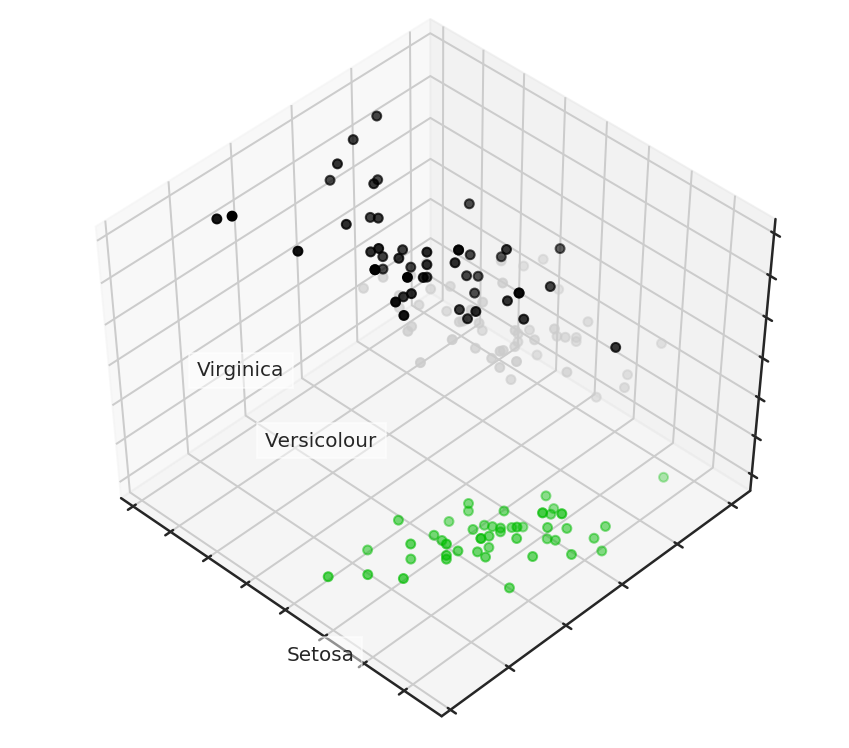

In [3]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# 改变标签的顺序，让其与数据匹配
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

现在让我们看看使用 PCA 是怎么样提高模型的识别性能的。同样先导入实验所用到的模块。

In [4]:
from sklearn.tree import DecisionTreeClassifier  # 导入决策树模型、
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score  # 识别准确率计算函数

莺尾花数据是一个相对容易区分的数据。因此，为了使实验结果对比明显。选用简单的决策树模型来对莺尾花数据进行分类。

In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

# 决策树的深度设置为 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1))))

Accuracy: 0.88889


从上面的结果可知。在不对数据进行处理的情况下，使用决策树模型对莺尾花数据进行分类的准确率为 0.88889。

现在使用 PCA 将莺尾花数据的维度降低到 2 维，然后画出降维后的数据分布图。

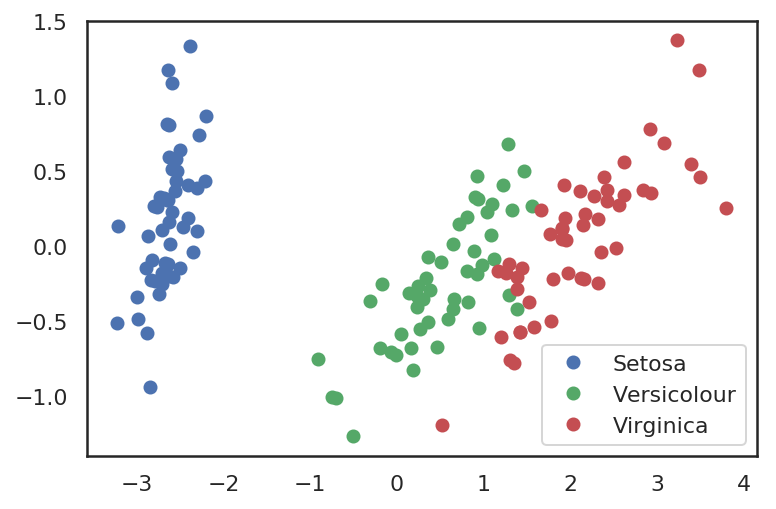

In [6]:
# 使用从 sklearn 提供的 PCA 接口，降数据降到 2 维
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# 可视化 PCA 降维后的结果
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

同样的方法，将降维后的莺尾花数据输入到决策树模型中。

In [7]:
# 训练集合测试集同时使用 PCA 进行降维
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1))))

Accuracy: 0.91111


从上面的结果可知，对数据进行 PCA 降维之后，决策树模型的识别准确率提升到了 0.91111。这说明了 PCA 确实可以有效改善大部分机器学习算法的准确性和计算效率。

那么降维后的每个主成分都来自于原始数据的哪些维度呢？让我们通过查看每个维度的方差百分比来解释这个问题。

In [8]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
                                                         round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


从上面结果可知，我们将 4 维的数据降为了 2 维数据。在降维后的数据中，第一维（也就是第一个成分）主要由原始数据的 $0.361 * \text { sepallength }-0.085 * \text { sepalwidth }+0.857 * \text { petallength }+0.358 * \text { petalwidth }$ 组成。

#### 手写数字数据集

在上面的例子中，莺尾花的原始数据只有 4 个维度。为了验证 PCA 在其他高维数据同样可行。接下来，使用之前实验所接触到的手写数字体数据集再完成一个示例练习。先导入手写数字数据集。

In [9]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

数据集中的每个手写数字都是由 8×8 矩阵表示，每个像素值的表示颜色强度。获取数据集的前 10 个数字。并对这 10 个手写数字体数据进行可视化。

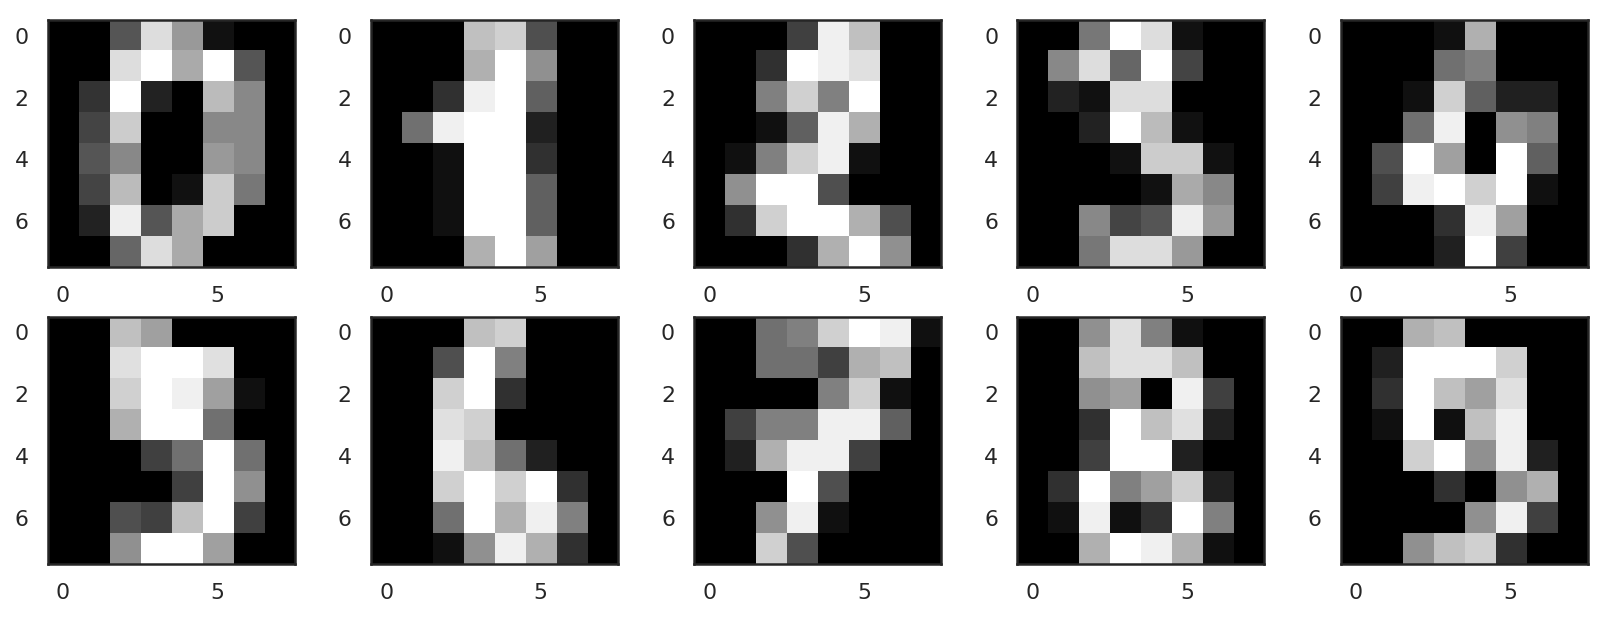

In [10]:
plt.figure(figsize=(14, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i, :].reshape([8, 8]), cmap='gray')

手写数字体数据集的维度是 8×8 维的，即 64 维。只有将其降维减少到 2 维，才能对其进行可视化，以便查看其分布状态。

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

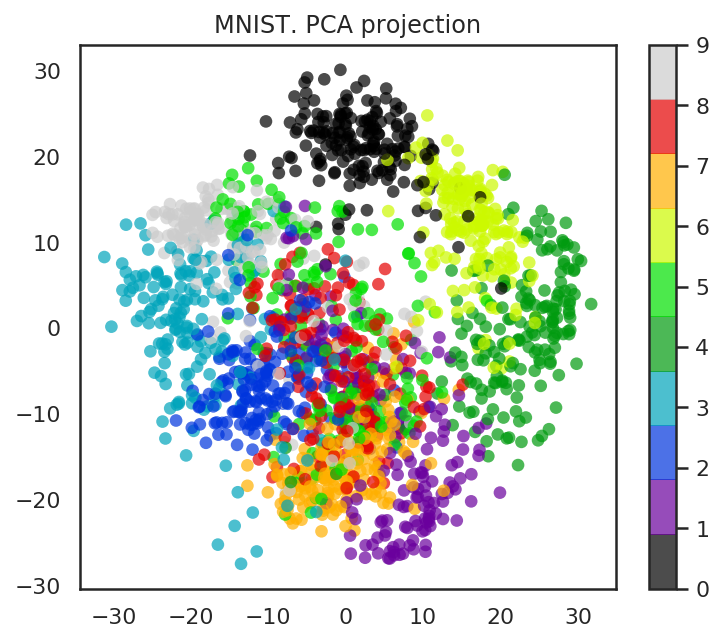

In [11]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

在上图中，总共包含十种颜色，每一种颜色对应一个类别标签。 

除了 PCA 之外，t-SNE 也是一种常用的降维算法。相比于 PCA， t-SNE 不具有线性约束。下面使用 t-SNE 来对手写数字体数据进行降维，并对降维后的数据进行可视化。

Text(0.5, 1.0, 'MNIST. t-SNE projection')

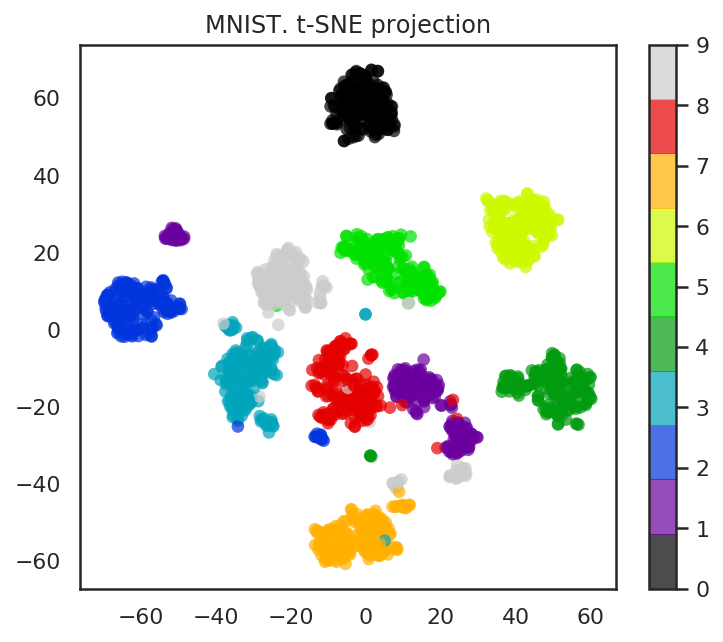

In [12]:
from sklearn.manifold import TSNE  # 导入 t-SNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

从上面的图中可以看出，t-SNE 相比于 PCA，降维效果要好很多。 但是 t-SNE 也有一个缺点，就是其运行时间要大大超过 PCA。在实际使用中，可以根据具体任务需求来选择。

在对手写数据集进行降维时，如果要保留原始数据的 90％ 散度，应该将数据降到多少维呢？先来画出主成分与其所保留的原始数据散度的关系。

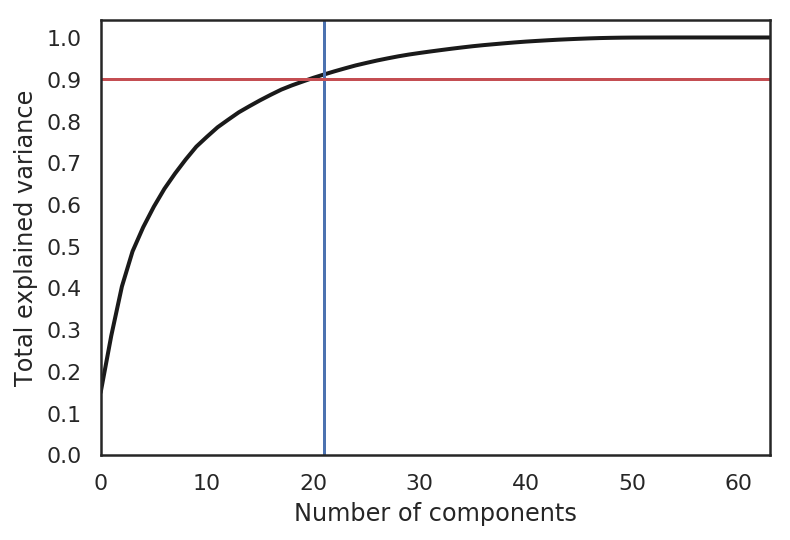

In [13]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

从上图中可以看出，要想保留原始数据 90% 的信息。需要保留 21 个主要组成成分。因此，需要将维度从 64 个特征减少到 21 个。

### 聚类

聚类是无监督学习算法中的一种。聚类背后的主要思想相对简单，往往可以根据数据点之间的距离来将同类样本聚合在一起。

<img width=60% src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557033202224">

上图展示的都是来自 scikit-learn 的不同算法的结果示例。

#### K-Means 聚类

K-Means 算法是所有聚类算法中最流行且最简单的算法。 下面是它的工作原理：

1. 选择认为最佳的类别数量 $k$，即样本大概可以分为多少个簇。
2. 在数据空间内随机初始化 $k$ 点为“质心”。
3. 将每个观察数据点划分到于其最近的簇的质心的簇。
4. 将质心更新为一个簇中所有数据点的中心。
5. 重复步骤 3 和 4 步骤直到所有质心都相对稳定。

为了更好的理解 K-Means 算法的原理，这里通过一个例子来进行说明。先构建出一个数据集并画图它的分布图，该数据集含有三个簇。

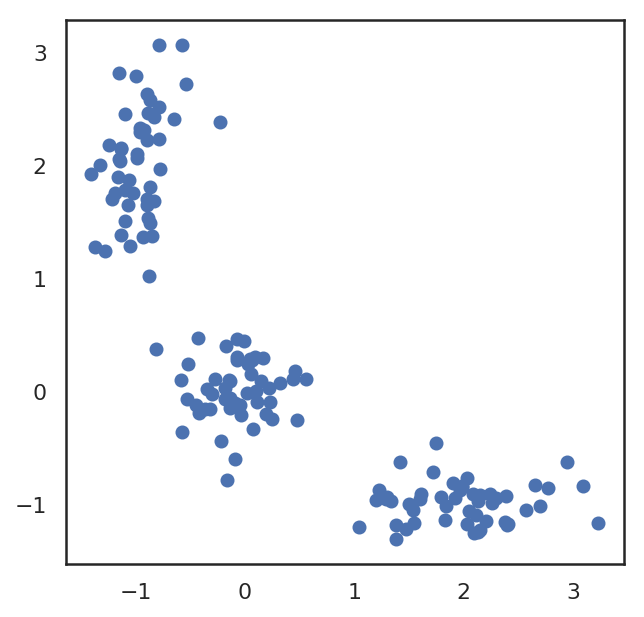

In [14]:
# 构造可分为三个簇的数据
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

开始动手实现 K-Means 算法， K-Means 算法的实现非常简单。按照上述的算法步骤逐步实现即可。在这里，我们使用欧几里德距离来衡量两个数据点之间的距离。当然，你也可以使用其他距离度量方式。 

In [15]:
# 调用 Scipy 库的距离计算函数，
# 用于计算数据点之间的距离
from scipy.spatial.distance import cdist

# 随机初始化三个中心点
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # 计算每个点到中心的距离
    distances = cdist(X, centroids)
    # 获取数据别分到哪个簇
    labels = distances.argmin(axis=1)
    # 根据数据到每个簇质心的距离，标记这些点的类别
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

可视化出 K-Means 算法的运行过程，以便更好地理解。

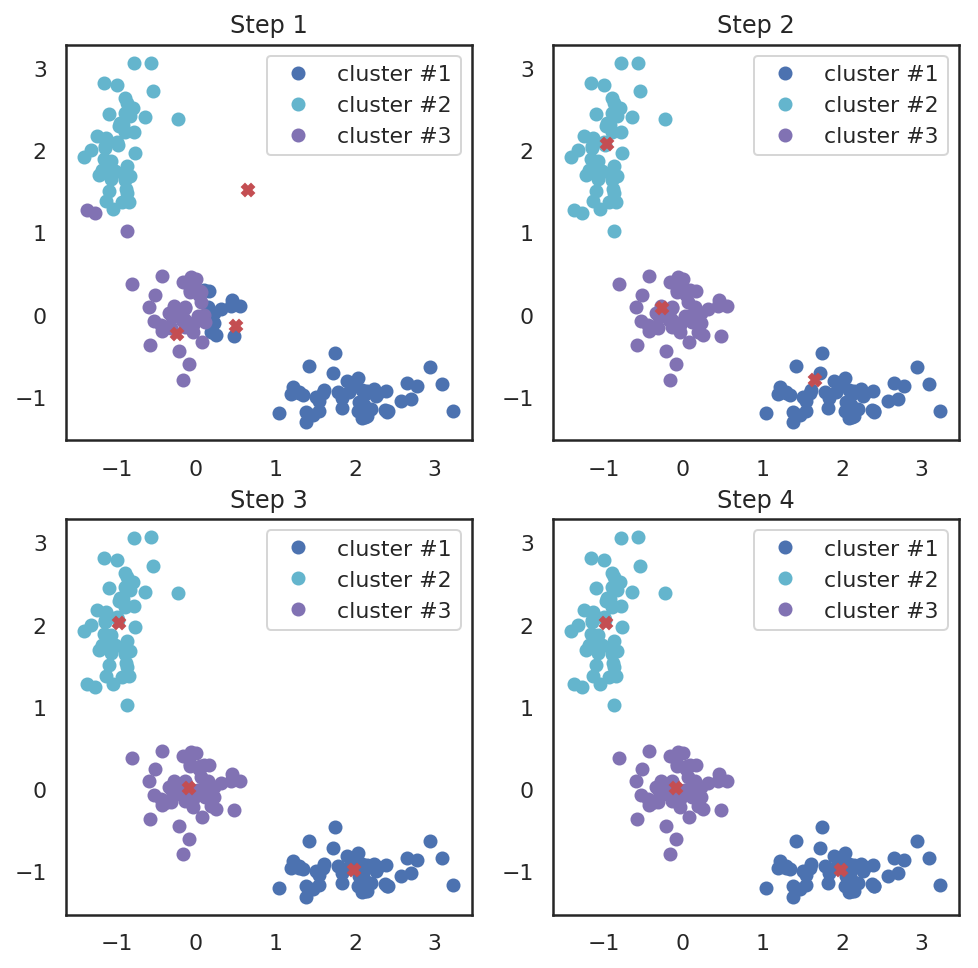

In [16]:
# 可视化 K 均值聚类步骤
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

从上图中可以看出，仅用两步模型就收敛了，速度非常之快。但该算法有一个缺点，就是它对聚类质心的初始位置的很敏感，也即是随机选取的初始质心值。但是，可以多次运行算法，然后平均所有质心结果。

#### K-均值算法中 K 值的选择

相比于分类和回归等监督学习任务，聚类算法没有使用含标签的数据。因此，聚类需要更有效的模型评价方法。 通常，当使用 K-Means 算法时，需要最小化观测数据点与其所在的簇的质心之间的平方距离之和。该值越小说明该类聚得越好。公式表达如下：

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

这里的 $C_k$  是第 $k$ 个簇所有样本的集合，$\mu_k$ 是 $C_k$ 的中心。

上面的定义看似合理，也就是希望数据点尽可能接近它们所属簇的质心。但也存在一个问题，当质心数（也就是 K 的值）等于样本数时，公式得到最优解，即 $J(C)$ 达到最小。此时的每个样本都会单独把自己作为一类。这显然是没有意义的。因为这结果相当于没有进行聚类。

为了避免这种情况，我们应该定义一个函数，使得 $J(C)$ 下降得不那么快。使用公式描述如下：

$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

为了更好的理解，先看看一个例子。因为 scikit-learn 也提供了各种聚类算法接口，而且使用这些接口有许多优点。例如：这些算法可以并行完成，有效减少了计算时间。所以在这里为了方便，直接使用 scikit-learn 提供的 K-Means 接口进行实验。

In [17]:
from sklearn.cluster import KMeans  # 导入 K-均值聚类模型

求出 K 值得选择与 $J(C_k)$ 的关系，并画出它们的关系图。

Text(0, 0.5, '$J(C_k)$')

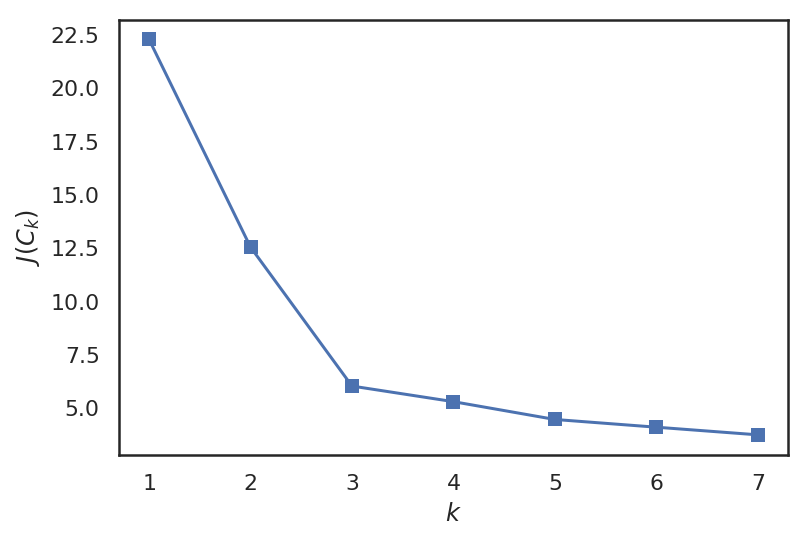

In [18]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

从上图中，可以看到当 $k$ 小于 3 时， $J(C_k)$ 下降得非常快。之后相对平稳。这意味着选择 $k$ 等于 3 最为合适。

#### K-均值存在的问题

实际上，K-Means 算法是一个 $\text{NPhard}$ 问题。对于 $n$ 个 $d$ 维数据，当我们想要将其聚为 $k$ 个簇时，K-Means 算法的复杂度为 $O(n^{d k+1})$ ，这意味着模型的训练需要大量的时间。不过，这里有一些启发式方法可以缓解这个问题，例如像 MiniBatch K-Means 算法。
它每次仅采用部分数据而不是一次使用整个数据集，然后通过前面所述的方法，通过一个簇中所有观测点的平均值来移动质心。

关于 K-Means 和 MiniBatch K-Means 的区别或差异可以查阅这份 [<i class="fa fa-external-link-square" aria-hidden="true"> scikit-learn 文档</i>](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html) 。

#### 近邻传播算法

近邻传播也属于聚类算法中的一种。 与 K-Means 不同的是，这种方法不需要事先设置簇的数量，也就是 K 的值。 近邻传播算法的主要思想是根据观测点之间的相似性来对数据进行聚类。

如果观察 $x_i$ 与观察点 $x_y$ 相似，但与观察点 $x_k$ 不相似，那么可以定义一个相似度函数 $s$，使得 $s(x_i, x_j) > s(x_i, x_k)$ 。通常采用距离的负平方 $s(x_i, x_j) = - ||x_i - x_j||^{2}$ 来度量两个观测点的相似性。

为了便于计算，通常通过定义两个矩阵来描述这种“相似性”，分别是 $r_{i,k}$ 和 $a_{i,k}$。 $r_{i,k}$ 表示吸引度，即样本 $x_k$ 适合作为 $x_i$ 的聚类中的的程度。
$a_{i,k}$ 表示归属度，也就是样本 $x_i$ 选择 $x_k$ 作为聚类中心的合适程度。它们的公式表达如下：

$$r_{i,k} \leftarrow s_(x_i, x_k) - \max_{k' \neq k} \left\{ a_{i,k'} + s(x_i, x_k') \right\}$$

$$a_{i,k} \leftarrow \min \left( 0, r_{k,k} + \sum_{i' \not\in \{i,k\}} \max(0, r_{i',k}) \right), \ \ \  i \neq k$$

$$a_{k,k} \leftarrow \sum_{i' \neq k} \max(0, r_{i',k})$$

#### 谱聚类

谱聚类也是一种常用的聚类算法，其结合了上述的一些方法来创建一个性能更强的聚类方法。与其他聚类方法不同，谱聚类是一种图模型。谱聚类将观测点作为图模型的节点，将观测点之间的相似度看作为图模型中节点之间的边。在图模型中，如果两个观测点的边越短，则两个观测点就越相似。

在谱聚类中，可以通过定义观测点的相似性矩阵来存放数据样本中每两个观测点之间的相似性，通常也称为邻接矩阵。 这可以采用与近邻传播算法类似的方式来构建完成：

$$A_{i, j} = - ||x_i - x_j||^{2}$$ 

相似矩阵相当于描绘了一张图。当图模型构建完成时，就可以对其进行切割。切割原则就是较长的边给切开。换句话说就是把相似的观测点分为一类。 在形式上，这是一个 Normalized cuts 问题，如果想了解更加详细的信息，建议阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> 这篇论文</i>](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)。

#### 凝聚聚类


如果你不知道要将数据样本聚为多少个簇，可以考虑使用凝聚聚类算法。凝聚聚类是所有聚类算法中相对简单，也相对容易理解的算法。

凝聚聚类的算法流程很简单，如下：

1. 首先将每个观测点都作为一个簇  
2. 然后按降序对每两个簇中心之间距离进行排序  
3. 取最近的两个相邻的簇并将它们合并为一个簇，然后重新计算簇中心  
4. 重复步骤 2 和 3 ，直到所有观测点都合并到一个簇中    

在每次迭代中，需要度量两个簇之间的距离。一般可以使用以下几种方法：

1. 单链接 
$$d(C_i, C_j) = min_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$$
2. 全连接 
$$d(C_i, C_j) = max_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$$
3. 平均连接 
$$d(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x_i \in C_i} \sum_{x_j \in C_j} ||x_i - x_j||$$
4. 质心连接 
$$d(C_i, C_j) = ||\mu_i - \mu_j||$$

第三个平均连接是计算时间最有效的，因为它不需要在每次合并后，重新计算距离。

凝聚聚类的聚类结果可以用树状图进行表示，以帮助识别算法应该在哪一步停止以获得最佳的聚类结果。 Python 也有很多工具可以构建这些树状图。

现在用凝聚聚类实现一下前面使用 K-Means 实现的聚类例子，这里直接调用 SciPy 提供的接口。 

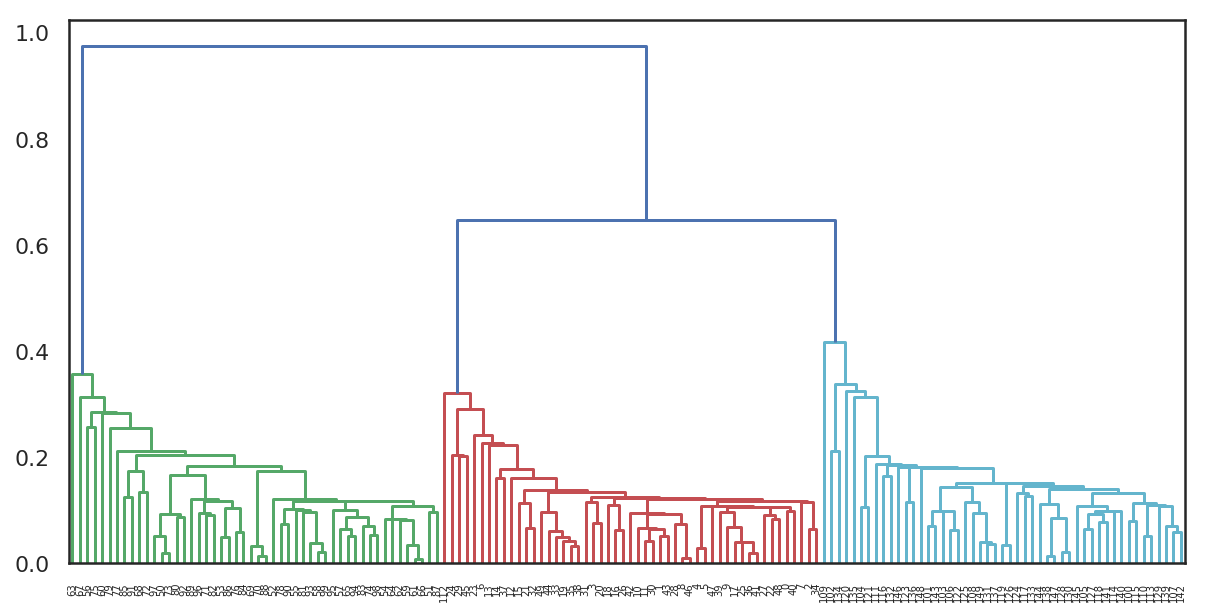

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))
# 构建数据集
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist将计算成对距离矩阵的上三角形
distance_mat = pdist(X)
# 连接 - 是一种凝聚算法的实现
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

上图显示的是一个凝聚聚类的树状图。从上图可以清晰的看到整个聚类的过程：先把每个样本作为一个簇，经过多次迭代最终聚为一个簇的过程。

### 聚类模型评价

聚类算法与许多的监督学习算法不同，因为聚类在训练时不需要数据标签，所以不能简单地使用监督学习的评价方法来进行评价。

聚类算法通常有内部和外部的评价标准。 外部评价指标是使用有关已知真实划分的信息，也就是要知道数据的真实类别。而内部指标不需要知道数据的真实类别，仅根据聚类结果来进行评估。

#### 调整兰德指数

兰德指数是一种常用的聚类评价方法。在该评价方法中，需要知道数据的真实标签，也需要数据集的聚类结果。 设 $n$  是样本中数据点对数的数量。 设 $a$ 表示在真实标签与聚类结果中都是同类别的观测点对数。 $b$ 表示在真实标签与聚类结果中都是不同类别的观测点对数。兰德指数可以表示为：

$$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ 


换句话说，兰德指数评估分割后的聚类结果和初始标签一致的比例。对于随机结果，$\text{RI}$ 并不能保证分数接近 0 。为了实现在聚类结果是随机产生的情况下，兰德指数应该接近零，所以有必要缩放其大小，由此得到了调整兰德指数：

$$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

该评价方法是对称的，不依赖于标签排列顺序。 因此，该指数是样本不同划分之间距离的度量。 $\text{ARI}$ 可取 $[-1,1]$ 范围内的值。 其值越大表示聚类结果越好。

#### 调整互信息

该评价指标与 $\text{ARI}$ 类似。 它也是对称的，不依赖于标签的具体值和排列顺序。 互信息 $\text{MI}$ 由 [<i class="fa fa-external-link-square" aria-hidden="true"> 信息熵</i>](https://en.wikipedia.org/wiki/Entropy_information_theory) 函数定义，用来衡量真实数据分布与聚类结果分布的吻合程度。

同 $\text{ARI}$ 一样，这里也定义了调整互信息 $\text{AMI}$ 。 这可以避免随着聚类数量的增加而导致 $\text{MI}$ 指数增长。$\text{AMI}$ 位于 $[0,1]$ 范围内。 其值越大意味着聚类结果越好。

#### 同质性、完整性、V-mearure

从形式上来看，这些指标也是基于熵函数和条件熵函数来定义的，将聚类结果看作是离散分布：

$$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)}$$

其中 $K$ 是聚类结果，$C$ 是原始数据。 因此，$h$ 评估的是每个簇是否由相同类别的数据点组成，$c$ 评估的是相同类别的数据点与所属簇的匹配程度。 这些指标不是对称的。两者都位于 $[0,1]$ 范围内，而接近 $1$ 的值表示更准确的聚类结果。 这些指标的值不像 $\text{ARI}$ 或 $\text{AMI}$ 指标进行缩放过，因此取决于簇的数量。 

当簇的数量很大且观测点的数量很小时，该评价方法也不会使评估值接近零。 在这种情况下，使用 $\text{ARI}$ 可能会更合理。 但是，如果观测点超过 100 个，且簇的数量少于 10 个，此问题则可以忽略。

$V-mearure$ 结合了 $h$ 和 $c$，为 $h$ 和 $c$ 的调和平均值。用来衡量两个划分结果的一致性。其公式如下：

$$v = 2\frac{hc}{h+c}$$

#### 轮廓系数

与上述评价指标相反，轮廓系数并不需要关于原始数据的真实标签信息。仅使用聚类结果来估计聚类的质量。设 $a$ 是数据点与一个簇内其他观测点之间距离的平均值，$b$ 是观测点到最近簇的观测点的平均距离。则一个观测点的轮廓值为：

$$s = \frac{b - a}{\max(a, b)}$$

样本的轮廓值是所有样本轮廓值的平均值。该系数的取值范围为 $[- 1,1]$。轮廓系数值越高，表示聚类的结果越好。

因此，通常如果不知道数据可以分为几类，则可以通过获取最大化轮廓系数来确定最佳聚类数 $ k $。

一般情况下，都不需要我们去实现上述的评价方法，因为在 `sklearn.metrics` 接口中已经提供，只需导入即可。

最后，通过实验来看看这些指标是如何评价 MNIST 手写数字数据集的，先导入必要的模块：

In [20]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

加载数据，并构建不同的聚类算法。

In [21]:
data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

使用不同评价指标对不同的聚类算法进行评价。

In [22]:
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness',
                                           'V-measure', 'Silhouette'],
                       index=['K-means', 'Affinity', 'Spectral', 'Agglomerative'])
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


### 实验总结

本次实验主要围绕无监督学习算法进行的，主要涉及到 PCA 降维方法、各种聚类方法以及各种对聚类模型的评价指标。至此，相信你会对无监督学习有一个清晰的了解，并会使用 PCA 来对数据进行降维。

<i class="fa fa-link" aria-hidden="true"> 相关链接</i>
- [<i class="fa fa-external-link-square" aria-hidden="true">  scikit-learn 聚类方法</i>](http://scikit-learn.org/stable/modules/clustering.html)
- [<i class="fa fa-external-link-square" aria-hidden="true">  PCA 案例</i>](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
- [<i class="fa fa-external-link-square" aria-hidden="true">  K-Means 与 EM 算法</i>](https://github.com/diefimov/MTH594_MachineLearning/blob/master/ipython/Lecture10.ipynb)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 了解实验楼《楼+ 机器学习和数据挖掘课程》</i>](https://www.shiyanlou.com/louplus/)